### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os


### reading the data

In [2]:
path=os.path.join(os.getcwd() ,'dataset', "anime.csv")
df=pd.read_csv(path, na_values=["Unknown"])

''' 

there was many "Unknown" and that could change datatype of some features ,
so we replace it directly with NaN using "na_values" in pandas module 

'''

df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",NaN,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",NaN,盗墓笔记之秦岭神树,ONA,NaN,"Apr 4, 2021 to ?",NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",NaN,見える子ちゃん,TV,NaN,2021 to ?,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17559,48488,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,NaN,"Jul, 2021 to ?",Summer 2021,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",NaN,ヤマノススメ Next Summit,TV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### discovering the data

In [3]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [4]:
df.columns

Index(['mal_id', 'name', 'score', 'genres', 'english_name', 'japanese_name',
       'type', 'episodes', 'aired', 'premiered', 'producers', 'licensors',
       'studios', 'source', 'duration', 'rating', 'ranked', 'popularity',
       'members', 'favorites', 'watching', 'completed', 'on-hold', 'dropped',
       'plan_to_watch', 'score-10', 'score-9', 'score-8', 'score-7', 'score-6',
       'score-5', 'score-4', 'score-3', 'score-2', 'score-1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         17562 non-null  int64  
 1   name           17562 non-null  object 
 2   score          12421 non-null  float64
 3   genres         17499 non-null  object 
 4   english_name   6997 non-null   object 
 5   japanese_name  17514 non-null  object 
 6   type           17525 non-null  object 
 7   episodes       17046 non-null  float64
 8   aired          17253 non-null  object 
 9   premiered      4745 non-null   object 
 10  producers      9768 non-null   object 
 11  licensors      3946 non-null   object 
 12  studios        10483 non-null  object 
 13  source         13995 non-null  object 
 14  duration       17007 non-null  object 
 15  rating         16874 non-null  object 
 16  ranked         15800 non-null  float64
 17  popularity     17562 non-null  int64  
 18  member

In [6]:
df.isna().sum()

mal_id               0
name                 0
score             5141
genres              63
english_name     10565
japanese_name       48
type                37
episodes           516
aired              309
premiered        12817
producers         7794
licensors        13616
studios           7079
source            3567
duration           555
rating             688
ranked            1762
popularity           0
members              0
favorites            0
watching             0
completed            0
on-hold              0
dropped              0
plan_to_watch        0
score-10           437
score-9           3167
score-8           1371
score-7            503
score-6            511
score-5            584
score-4            977
score-3           1307
score-2           1597
score-1            459
dtype: int64

#  data preprocessing and virtualization

##### drop unnecessary columns and rows

In [7]:
df.drop(columns=['mal_id','english_name','japanese_name'], inplace=True)
df.drop(columns=['producers','licensors','source','ranked'], inplace=True)



In [8]:
df.drop(index=df[df['genres'].isna()].index.tolist(), inplace=True)

##### virtualize the "genres " column

C:\Users\LORD TRADE\AppData\Local\Temp\ipykernel_23496\44937663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='viridis')


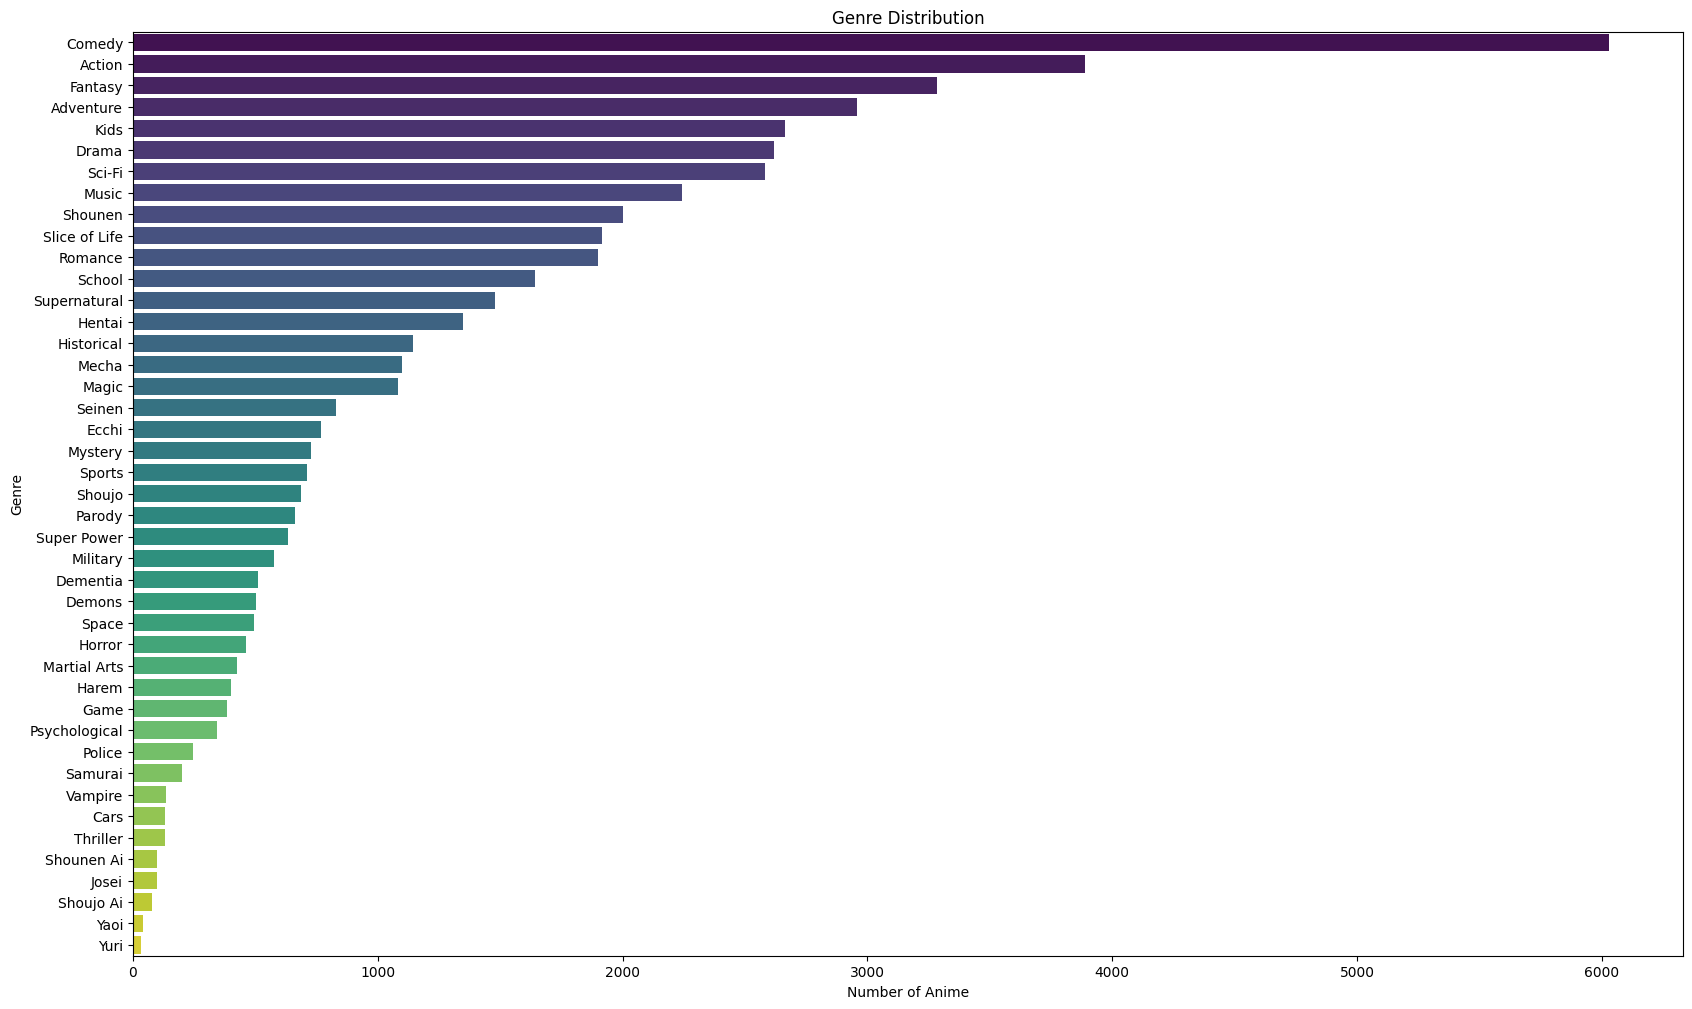

In [9]:
all_genres = df['genres'].str.split(', ').explode()
genre_counts = all_genres.value_counts()
plt.figure(figsize=(20, 12))

sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='viridis')
# sns.barplot(x=genre_counts.values, hue=genre_counts.index,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Anime')
plt.ylabel('Genre')
plt.show()

In [10]:
fig = px.bar(y=genre_counts.values, x=genre_counts.index)
# fig.update_layout(
#     width=1200,  
#     height=800)
fig.show()

## handle the ' premiered ' and  ' aired ' columns

In [11]:
df['year']=df['aired'].str.split('to').str[0].str.split(',').str[-1]
df['season']=df['aired'].str.split('to').str[0].str.split(' ').str[0].str.split(',').str[0]
df['season'].unique()

array(['Apr', 'Sep', 'Jul', 'Oct', 'Mar', 'Nov', 'Feb', 'Jan', 'Dec',
       'May', 'Aug', 'Jun', '2003', '2000', '1997', '1995', '2006',
       '1979', '2005', '2002', '2004', '2001', '1986', '1964', nan,
       '1998', '1929', '1991', '1975', '2008', '1977', '1982', '1999',
       '1936', '2007', '1928', '1987', '1969', '1989', '2011', '1931',
       '1932', '1933', '1996', '1994', '1963', '1976', '1935', '1934',
       '1939', '1942', '1948', '1950', '1992', '1990', '1962', '1960',
       '1961', '1967', '1972', '1965', '1974', '1968', '1966', '1978',
       '1973', '1970', '1985', '2009', '1988', '1924', '1925', '1926',
       '1946', '1981', '2010', '1980', '1993', '1984', '2012', '1983',
       '1971', '2013', '1917', '2014', '1947', '1952', '1940', '1941',
       '1937', '1951', '1954', '1956', '1959', '2015', '1938', '1927',
       '2022', '1958', '2021', '2016', '2019', '1930', '2017', '2018'],
      dtype=object)

In [12]:
def map_seasons(x):
    if x in ['Dec','Jan','Feb']:
        return 'Winter'
    elif x in ['Apr', 'Mar','May']:
        return 'Spring'
    elif x in ['Jun', 'Jul','Aug']:
        return 'Summer'
    elif x in ['Sep', 'Oct','Nov']: 
        return "Fall"
        
    elif pd.isna(x):
        return np.nan

    else:
        return '-'
df['season']=df['season'].apply(map_seasons)

In [13]:
df['premiered']=df['premiered'].fillna(df['season']+df['year'] )

In [14]:
df.drop(index=df[df['premiered'].isna()& df['year'].isna()& df['season'].isna()].index.to_list(), inplace=True)

In [15]:
df.head()

,name,score,genres,type,episodes,aired,premiered,studios,duration,rating,...,score-8,score-7,score-6,score-5,score-4,score-3,score-2,score-1,year,season
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,24 min. per ep.,R - 17+ (violence & profanity),...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998,Spring
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sep 1, 2001",Fall 2001,Bones,1 hr. 55 min.,R - 17+ (violence & profanity),...,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,2001,Fall
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,24 min. per ep.,PG-13 - Teens 13 or older,...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1998,Spring
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,25 min. per ep.,PG-13 - Teens 13 or older,...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,2002,Summer
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,23 min. per ep.,PG - Children,...,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,2004,Fall


In [16]:
count = df.groupby(by='season')['name'].count().sort_values(ascending=False)
fig =px.bar(data_frame=df,
       x=count.index,
         y=count.values ,
       labels={'x': 'Season', 'y': 'Number of Anime'},
       title='Number of Anime per Season')

fig.show()

In [17]:
fig = px.histogram(df, x='season',
                   color='type',
                   barmode='group',
                    title='Number of Anime by Season and Type')
fig.show()

In [18]:
df['duration']

0        24 min. per ep.
1          1 hr. 55 min.
2        24 min. per ep.
3        25 min. per ep.
4        23 min. per ep.
              ...       
17556     9 min. per ep.
17557                NaN
17558                NaN
17559                NaN
17561                NaN
Name: duration, Length: 17192, dtype: object

In [19]:
def time(x):
    if isinstance(x, str):
        total_minutes = 0 
         
        if 'hr.' in x:
            hours = int(x.split('hr.')[0].strip())
            total_minutes += hours * 60 
            
        if 'min.' in x:
            minutes = int(x.split('min.')[0].strip().split()[-1])
            total_minutes += minutes
        
        if 'sec.' in x:
            seconds = int(x.split('sec.')[0].strip().split()[-1])
            total_minutes += seconds / 60 
            
        return total_minutes


df['duration']=df['duration'].apply(time)

#### handle the missing values in " duration " column

In [20]:
df['duration']

0         24.0
1        115.0
2         24.0
3         25.0
4         23.0
         ...  
17556      9.0
17557      NaN
17558      NaN
17559      NaN
17561      NaN
Name: duration, Length: 17192, dtype: float64

In [21]:
fig = px.box(data_frame=df,
              x='type',
              y='duration',
       title='box plot for every type and duration')
fig.show()

In [22]:
avg_duration_by_type = df.groupby('type')['duration'].median()

df['duration'] = df.apply(
    lambda row: avg_duration_by_type[row['type']] if pd.notna(row['type']) and pd.isna(row['duration']) else row['duration'], 
    axis=1
)


In [23]:
df['duration'].isna().sum()

6

##### drop some unnecessary rows , noticed in the data by eye

In [24]:
x=df[(df['aired'].str.split("to").str[-1]==' ?')& (df['episodes'].isna())& (df['season']=='-')].index.tolist()
df.drop(index=x , inplace=True)

##### there is many animes here is not complete yet , so we created new column named " status " 

In [25]:
df['status'] = df['episodes'].isna().apply(lambda x: 'Ongoing' if x else 'Completed')

In [26]:
fig = px.histogram(df,
                    x='type',
                    color='year',
                     title=' Number of Anime by type and year') 
fig.show()

#### handle the missing values in " episodes " column

In [27]:
df['episodes']

0        26.0
1         1.0
2        26.0
3        26.0
4        52.0
         ... 
17554     NaN
17556    48.0
17557     NaN
17559     NaN
17561     NaN
Name: episodes, Length: 17136, dtype: float64

In [28]:
fig = px.box(data_frame=df,
        x='type',
        y='episodes',
       title='box plot for every type and episodes')
fig.show()

In [29]:
avg_episodes_by_type = df.groupby('type')['episodes'].median()

df['episodes'] = df.apply(
    lambda row: avg_episodes_by_type[row['type']] if pd.isna(row['episodes']) else row['episodes'], 
    axis=1
)

In [30]:
df['episodes'].isna().sum()

0

## best and worse 5 animes


In [31]:
columns= ['favorites', 'watching', 'completed', 'on-hold', 'dropped', 'plan_to_watch']


best_5= df.sort_values(by='popularity')[1:10]
# best_5
fig = px.bar(
    best_5,
    x='name', 
    y=columns, 
    title='Top 5 Anime Based on Popularity',
    labels={'value': 'Count', 'name': 'Anime Name'},
    barmode='group' 
)

fig.show()

In [32]:
worst_5 = df.sort_values(by='popularity', ascending=True).tail(5)

columns= ['favorites', 'watching', 'completed', 'on-hold', 'dropped', 'plan_to_watch']


fig = px.bar(
    worst_5,
    x='name', 
    y=columns,
    title='Worst 5 Anime Based on Popularity',
    labels={'value': 'Count', 'name': 'Anime Name'},
    barmode='group'
)

fig.show()

#### handle the missing values in " rating " column

In [33]:
df['rating'].value_counts()

rating
PG-13 - Teens 13 or older         6063
G - All Ages                      5623
PG - Children                     1447
Rx - Hentai                       1344
R - 17+ (violence & profanity)    1141
R+ - Mild Nudity                   993
Name: count, dtype: int64

In [34]:
px.pie(data_frame=df,names=df['rating'],
       title='pie plot for the percentage for each genre')

In [35]:
df['genres_split'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres_split')
rating_by_genre = df_exploded.groupby('genres_split')['rating'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_rating(row):
    if pd.isna(row['rating']):
        if pd.notna(row['genres']):  
            genres = row['genres'].split(', ')  
            inferred_ratings = [rating_by_genre.get(genre) for genre in genres if genre in rating_by_genre]
            inferred_ratings = [r for r in inferred_ratings if r is not None]  
            if inferred_ratings:
                return max(set(inferred_ratings), key=inferred_ratings.count)  
    return row['rating']

df['rating'] = df.apply(fill_rating, axis=1)

In [36]:
genres_counts=df_exploded.groupby(['genres_split','rating']).size().reset_index(name='count')
px.bar(genres_counts,x='genres_split',
       y='count',
       color='rating',
       title=' Number of genres by rating ')

#### handle the missing values in " score " column

In [37]:
df['score']

0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
17554     NaN
17556     NaN
17557     NaN
17559     NaN
17561     NaN
Name: score, Length: 17136, dtype: float64

In [38]:
score_columns = [f'score-{i}' for i in range(1, 11)]
weights = np.arange(1, 11) 

df['weighted_score'] = (
    df[score_columns].multiply(weights, axis=1).sum(axis=1) /
    df[score_columns].sum(axis=1)
)

df['score'] = df['score'].fillna(df['weighted_score'])

df.drop(columns=['weighted_score'], inplace=True)


In [39]:
df['score'].isna().sum()

105

In [40]:
df['score'] = df.apply(
    lambda row: row['popularity'] * 0.1 + row['episodes'] * 0.05 if pd.isna(row['score']) else row['score'],
    axis=1
)


In [41]:
df.isna().sum()

name                0
score               0
genres              0
type                0
episodes            0
aired               0
premiered           0
studios          6784
duration            0
rating              0
popularity          0
members             0
favorites           0
watching            0
completed           0
on-hold             0
dropped             0
plan_to_watch       0
score-10          237
score-9          2816
score-8          1065
score-7           276
score-6           262
score-5           318
score-4           681
score-3           998
score-2          1270
score-1           223
year                0
season              0
status              0
genres_split        0
dtype: int64

In [42]:
df.drop(columns=['aired', 'score-10',
       'score-9', 'score-8', 'score-7', 'score-6', 'score-5', 'score-4',
       'score-3', 'score-2', 'score-1','genres_split'],inplace=True)

In [43]:
df.isna().sum()

name                0
score               0
genres              0
type                0
episodes            0
premiered           0
studios          6784
duration            0
rating              0
popularity          0
members             0
favorites           0
watching            0
completed           0
on-hold             0
dropped             0
plan_to_watch       0
year                0
season              0
status              0
dtype: int64

#### modeling using cosine_similarity

In [44]:
df.columns

Index(['name', 'score', 'genres', 'type', 'episodes', 'premiered', 'studios',
       'duration', 'rating', 'popularity', 'members', 'favorites', 'watching',
       'completed', 'on-hold', 'dropped', 'plan_to_watch', 'year', 'season',
       'status'],
      dtype='object')

* `Choose the recommendation system`

> genres + type


In [45]:
df.head(20)

,name,score,genres,type,episodes,premiered,studios,duration,rating,popularity,members,favorites,watching,completed,on-hold,dropped,plan_to_watch,year,season,status
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,Spring 1998,Sunrise,24.0,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678,329800,1998,Spring,Completed
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,Fall 2001,Bones,115.0,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770,57964,2001,Fall,Completed
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,Spring 1998,Madhouse,24.0,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925,146918,1998,Spring,Completed
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,Summer 2002,Sunrise,25.0,PG-13 - Teens 13 or older,1467,94683,587,4300,46165,5121,5378,33719,2002,Summer,Completed
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,Fall 2004,Toei Animation,23.0,PG - Children,4369,13224,18,642,7314,766,1108,3394,2004,Fall,Completed
5,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145.0,Spring 2005,Gallop,23.0,PG-13 - Teens 13 or older,1003,148259,2066,13907,78349,14228,11573,30202,2005,Spring,Completed
6,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",TV,24.0,Spring 2005,J.C.Staff,23.0,PG-13 - Teens 13 or older,687,214499,4101,11909,81145,11901,11026,98518,2005,Spring,Completed
7,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",TV,52.0,Fall 2002,Nippon Animation,23.0,PG-13 - Teens 13 or older,3612,20470,231,817,13778,828,1168,3879,2002,Fall,Completed
8,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",TV,24.0,Spring 2004,A.C.G.T.,27.0,PG-13 - Teens 13 or older,1233,117929,979,6082,90967,3053,1356,16471,2004,Spring,Completed
9,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",TV,74.0,Spring 2004,Madhouse,24.0,R+ - Mild Nudity,169,614100,29436,64648,214491,47488,23008,264465,2004,Spring,Completed


In [46]:
df['geners_type']= df['genres'] + ', ' + df['type']

> genres + status

In [47]:
df['geners_status']= df['genres'] + ', ' + df['status']


> genres + rating

In [48]:
df['genersrating']= df['genres'] + ', ' + df['rating']

> genres + watching

In [49]:
df['geners_watching']= df['genres'] + ', ' + df['watching'].astype(str)

In [64]:
df["studios"].unique(

)

array(['Sunrise', 'Bones', 'Madhouse', ..., 'Irawias',
       'SILVER LINK., Studio Palette', 'Studio Kafka'], dtype=object)

In [65]:
df[df["studios"]=='']

,name,score,genres,type,episodes,premiered,studios,duration,rating,popularity,...,on-hold,dropped,plan_to_watch,year,season,status,geners_type,geners_status,genersrating,geners_watching


In [51]:
df['studios'].isna().sum()

6784

In [52]:
csv_path=os.path.join(os.getcwd(), 'dataset' ,"dataset_processed.csv")
df.to_csv(csv_path)

In [53]:
df1=pd.read_csv('dataset\dataset_processed.csv')
# df1["studios"] = df1["studios"].fillna("")


In [54]:
df1.isna().sum()


Unnamed: 0            0
name                  0
score                 0
genres                0
type                  0
episodes              0
premiered             0
studios            6784
duration              0
rating                0
popularity            0
members               0
favorites             0
watching              0
completed             0
on-hold               0
dropped               0
plan_to_watch         0
year                  0
season                0
status                0
geners_type           0
geners_status         0
genersrating          0
geners_watching       0
dtype: int64